# 导入包

In [10]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset,random_split,DataLoader
import matplotlib.pyplot as plt

# 设置全局变量

In [11]:
batch_size=512
lr  = 1
epoch_num = 200

# 构造数据集
满足7000用于训练 3000用于测试

In [12]:
random.seed(42)
torch.manual_seed(42)
class CategoryDataset(Dataset):
    def __init__(self):
        self.num_sample = 5000
        self.num_features = 200
        self.x_1 = torch.normal(2,1,(self.num_sample,self.num_features))
        self.y_1 = torch.ones(self.num_sample,1)

        self.x_2 = torch.normal(2,1,(self.num_sample,self.num_features))
        self.y_2 = torch.ones(self.num_sample,1)
        self.X = torch.cat((self.x_1,self.x_2),0)
        self.Y = torch.cat((self.y_1,self.y_2),0)
    def __len__(self):
        return self.num_sample*2
    def __getitem__(self, index):
        return self.X[index],self.Y[index]
train_size = 7000
test_size = 10000 - train_size
dataset = CategoryDataset()
print(len(dataset))
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
print("训练集样本数:", len(train_dataset))
print("测试集样本数:", len(test_dataset))
train_loader= DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

10000
训练集样本数: 7000
测试集样本数: 3000


# 定义激活函数 定义网络结构 定义网络初始化参数
# 定义损失函数 定义优化器

In [13]:
inputs = 200
hiddens = 128
out = 1
W_1 = torch.tensor(np.random.normal(0, 0.01, (inputs,hiddens)), dtype=torch.float32)
b_1 = torch.zeros(1,dtype=torch.float32)
W_2= torch.tensor(np.random.normal(0, 0.01, (hiddens,out)), dtype=torch.float32)
b_2 = torch.zeros(1,dtype=torch.float32)
parma = [W_1,b_1,W_2,b_2]
for  i in parma:
    i.requires_grad=True

def relu(x):
    x = torch.max(x,torch.tensor(0.0))
    return x

def sigmod(z):
    return 1/(1+torch.exp(-1*z))

def net(x):
    t = relu(torch.matmul(x,W_1)+b_1)
    return sigmod(torch.matmul(t,W_2)+b_2)

def cross_entropy(y_hat, y):
    log_softmax_out = torch.log(y_hat + 1e-7)  # 添加一个小的常数，避免对数中的零
    loss = -torch.sum(y * log_softmax_out) / len(y)
    return loss


def sgd(params, lr, batch_size):

    for param in params:

        param.data -= lr * param.grad / batch_size


# 训练与模型评估

In [14]:
import time

train_loss =[]
test_loss = []
train_acc=[]
test_acc= []
start_time = time.time()
for epoch in range(epoch_num):
    acc_list =[]
    loss_list=[]
    for x,y in train_loader:
        y_hat = net(x)
        l = cross_entropy(y_hat,y)
        l.backward()
        sgd(parma,lr,batch_size)
        for i in parma:
            i.grad.data.zero_()
        loss_list.append(l.item())
        # 准确度评估
        acc =0
        for index in range(y.size()[0]):
            tt = 0
            if y_hat[index]>0.5:
                tt=1
            if tt == y[index]:
                acc+=1
        acc_list.append(acc/y.size()[0])
    train_loss_mean=np.mean(loss_list)
    train_acc_mean=np.mean(acc_list)
    train_loss.append(train_loss_mean)
    train_acc.append(train_acc_mean)

    acc_list =[]
    loss_list=[]
    for x,y in test_loader:
        y_hat = net(x)
        l = cross_entropy(y_hat,y)
        # print(l)
        loss_list.append(l.item())
        # 准确度评估
        acc =0
        for index in range(y.size()[0]):
            tt = 0
            if y_hat[index]>0.5:
                tt=1
            if tt == y[index]:
                acc+=1
        acc_list.append(acc/y.size()[0])
    test_loss_mean=np.mean(loss_list)
    test_acc_mean=np.mean(acc_list)
    test_loss.append(test_loss_mean)
    test_acc.append(test_acc_mean)
    print("epoch:",epoch+1,"\n","train_loss:",train_loss_mean,"train_acc",train_acc_mean
          ,"\n",
          "test_loss:",test_loss_mean,"test_acc",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 0.6703460514545441 train_acc 0.8561662946428571 
 test_loss: 0.6352953016757965 test_acc 1.0
epoch: 2 
 train_loss: 0.6004939377307892 train_acc 1.0 
 test_loss: 0.5554876128832499 test_acc 1.0
epoch: 3 
 train_loss: 0.5083496677024024 train_acc 1.0 
 test_loss: 0.4487266292174657 test_acc 1.0
epoch: 4 
 train_loss: 0.39339403595243183 train_acc 1.0 
 test_loss: 0.32896241545677185 test_acc 1.0
epoch: 5 
 train_loss: 0.2791919069630759 train_acc 1.0 
 test_loss: 0.22585331896940866 test_acc 1.0
epoch: 6 
 train_loss: 0.1903246875320162 train_acc 1.0 
 test_loss: 0.1538809190193812 test_acc 1.0
epoch: 7 
 train_loss: 0.13128248815025603 train_acc 1.0 
 test_loss: 0.10819947347044945 test_acc 1.0
epoch: 8 
 train_loss: 0.09411899745464325 train_acc 1.0 
 test_loss: 0.0794485608736674 test_acc 1.0
epoch: 9 
 train_loss: 0.07044231093355588 train_acc 1.0 
 test_loss: 0.060799788062771164 test_acc 1.0
epoch: 10 
 train_loss: 0.05479626038244793 train_acc 1.0 
 test_lo

# 模型评估
训练用时148.90秒
从实验数据可以看出，Loss在每个epoch中逐渐减小，直到达到非常小的值。
手动实现的2分类模型在训练数据上表现良好，Loss逐渐减小，预测精度可能较高。

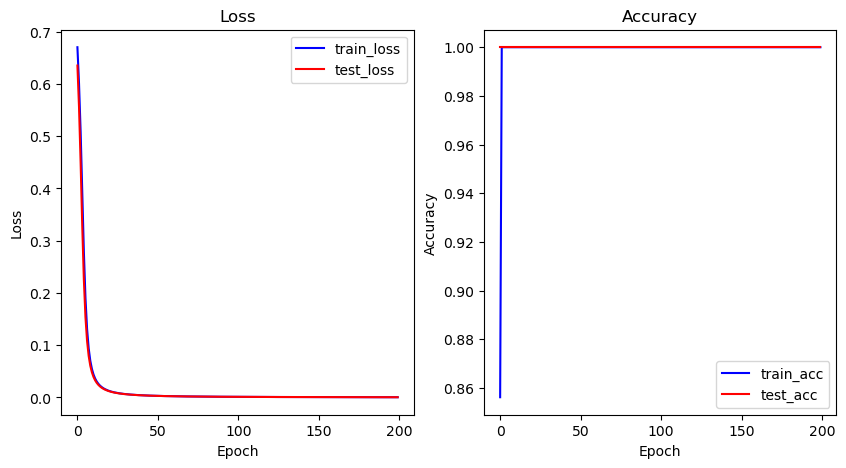

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, 'b-',label="train_loss")
plt.plot(test_loss, 'r-' ,label="test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, 'b-',label="train_acc")
plt.plot(test_acc, 'r-' ,label="test_acc")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()